# Problem Statement : Classification
Predicting the region with consumption of Avocados, where region is the target col which is a multiclass target col.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

## Loading Dataset & Creating New Dataframe

In [3]:
avocado = pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df = pd.DataFrame(avocado)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Separate df created.

## Date Column Treatment

In [5]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [6]:
df['month'] = pd.DatetimeIndex(df['Date']).month

In [7]:
df['day'] = pd.DatetimeIndex(df['Date']).day

In [8]:
df.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

- year, month & day is separated and created as new col in the dataframe.
- Date & Unammed  col is removed after creating new col of month,year & days.

## Initial Analysis

In [9]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- Dataset has mixed data types float, int and object type.
- Value of data are not in same range.

In [10]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
day               int64
dtype: object

- Mixed data types containing float,int & object types

In [11]:
df.shape

(18249, 14)

- dataframe has 18249 rows & 14 cols

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


- the dataset has 9 float var.
- 3 Int var
- 2 Object var
- index 0 = Average price & Index 13 = day col

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


- Mean is greater then 50th Percentile in total volume, 4046,4225 & 4770 col.
- Diff seen in Max & 75th Percentile in total volume, 4046,4225 & 4770 col.
- as per above obs it seems there are outliers present in those col.

# Missing Value Detection

In [14]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

- No Missing value seen in the dataset.
- There are 0 values in 4046,4225,4770 but i have not treated as missing value as there value is 0 on that particular day.
- Cat variable having 0s dropped later in the process below

# Histplot

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

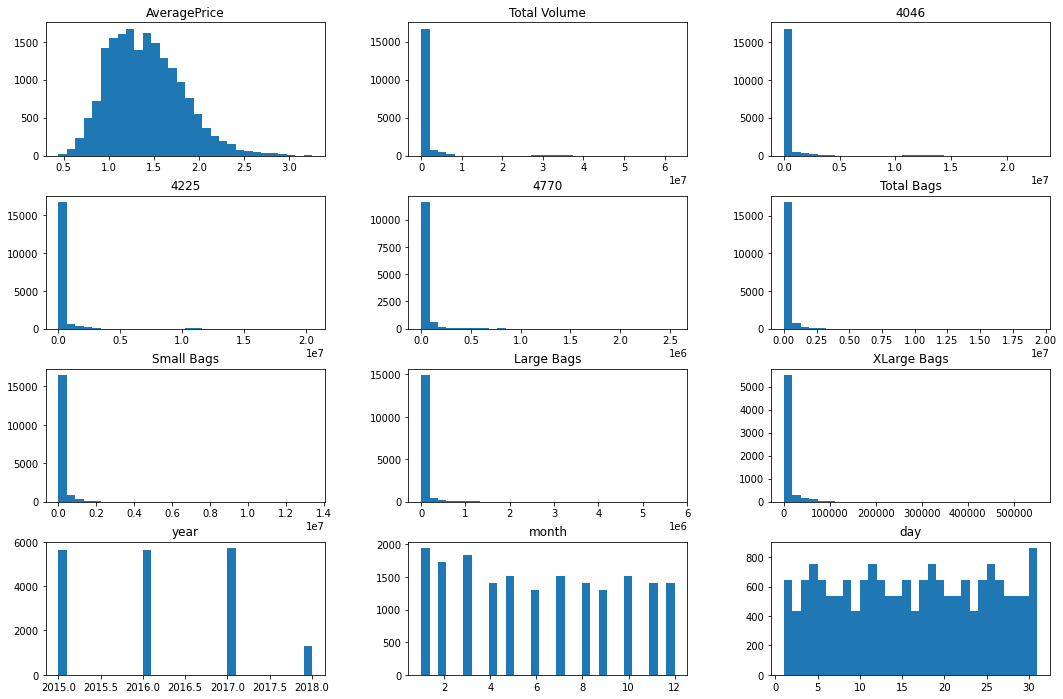

In [19]:
df.hist(grid=False, figsize=(18,12), bins=30)

- total volume, 4046,4225 & 4770 col are right skewed.

## Countplot for Categorical Variable

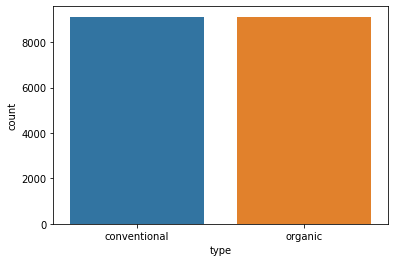

In [22]:
sns.countplot(df['type']);

- Type has 2 class.
- And there is no big diff in there count.

In [23]:
df.groupby('type').size()

type
conventional    9126
organic         9123
dtype: int64

- Type has 2 class.
- And there is no big diff in there count.

In [24]:
df.groupby('year').size()

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64

- year col has 4 class of years where year freq of year 2016 is high and freq of year 2018 is less.
-  freq of year 2015 & 2016 is almost same.

In [25]:
df.groupby('region').size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

- Multiclass target col has equal number of obs for each class.

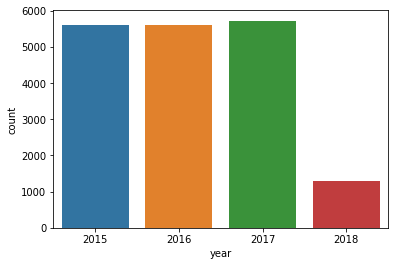

In [26]:
sns.countplot(df['year']);

- year 2018 has the least count and year 2017 has the highest count

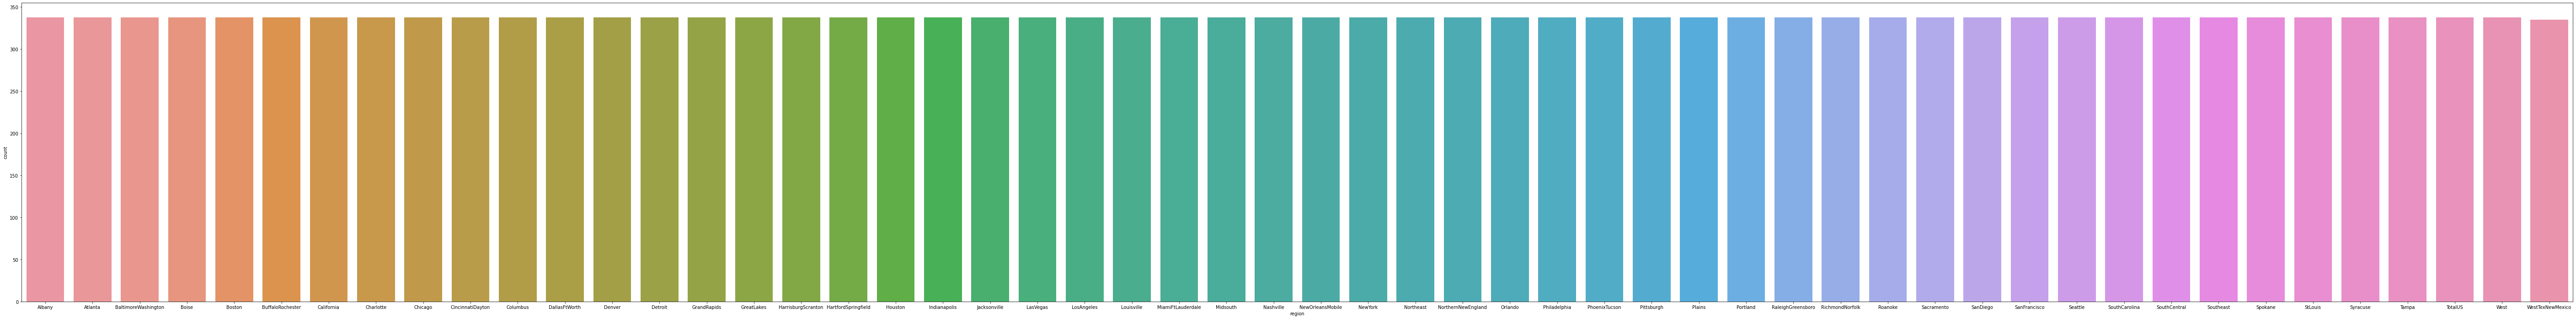

In [27]:
fig, ax =plt.subplots(figsize=(100,12))
sns.countplot(df['region']);

- Multiclass target col has equal number of obs for each class.

## Bar plot for Categorical variables 

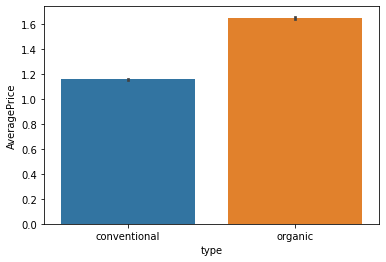

In [29]:
ax = sns.barplot(x='type', y= 'AveragePrice' , data=df)

- Organic Class in type col has high avg price

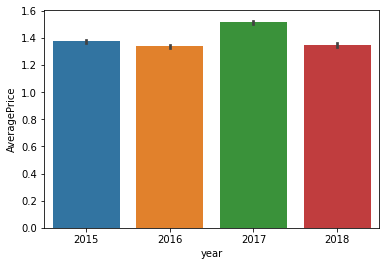

In [30]:
ax = sns.barplot(x='year', y= 'AveragePrice' , data=df)

-  year 2017 has high avg price

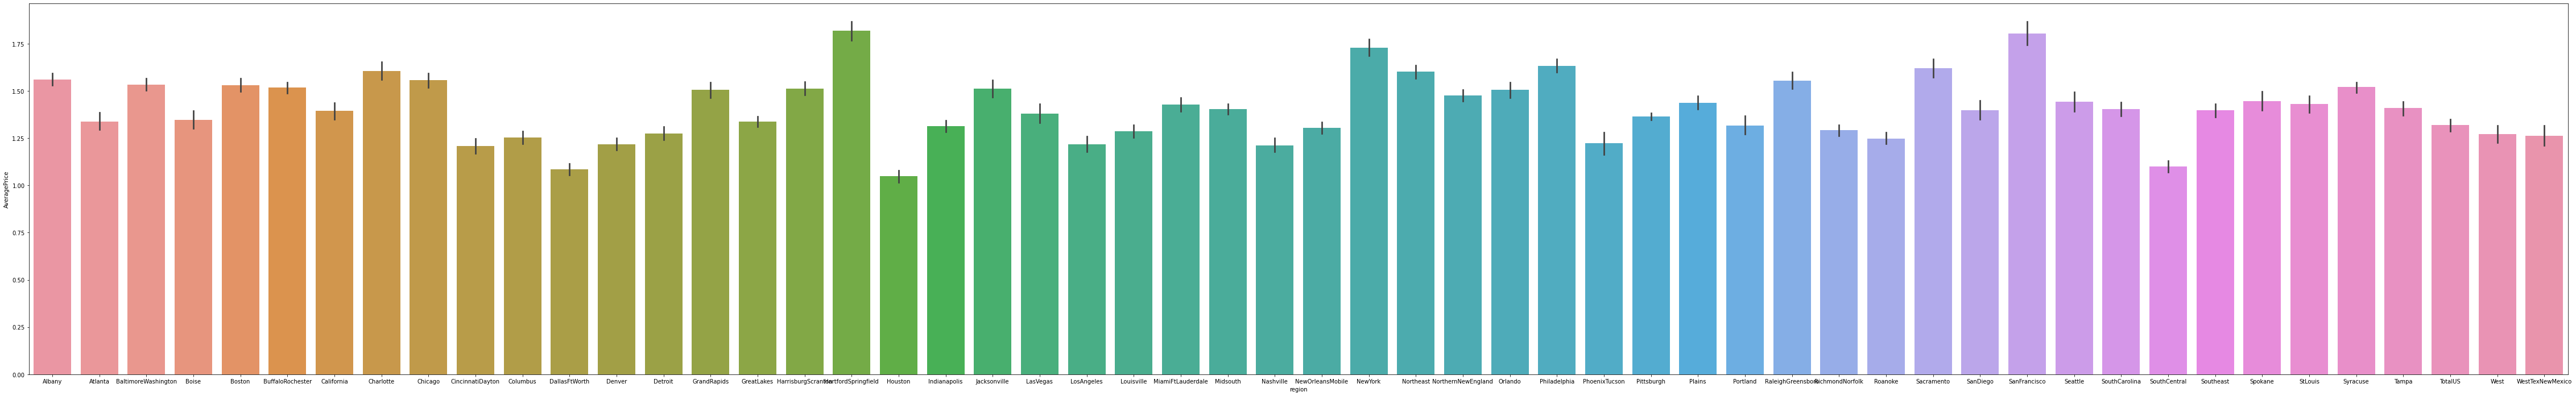

In [31]:
fig, ax =plt.subplots(figsize=(80,12))
ax = sns.barplot(x='region', y= 'AveragePrice' , data=df)

- There is no big difference in average price of avocado with respect to all region in target col.

# Correlation

In [32]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
AveragePrice,1.000000,-0.192752,-0.206664,-0.172692,-0.177155,-0.177048,-0.174500,-0.171406,-0.105900,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977453,0.974077,0.871923,0.963046,0.967231,0.880536,0.743734,0.017193,-0.024689,-0.009747
4046,-0.206664,0.977453,1.000000,0.925583,0.832799,0.919644,0.924859,0.838177,0.695660,0.003576,-0.026037,-0.010411
4225,-0.172692,0.974077,0.925583,1.000000,0.887517,0.905680,0.915916,0.809792,0.685176,-0.009718,-0.022014,-0.012333
4770,-0.177155,0.871923,0.832799,0.887517,1.000000,0.791990,0.802407,0.698029,0.676424,-0.036558,-0.033396,-0.009048
Total Bags,-0.177048,0.963046,0.919644,0.905680,0.791990,1.000000,0.994330,0.942939,0.801449,0.071512,-0.022725,-0.004987
Small Bags,-0.174500,0.967231,0.924859,0.915916,0.802407,0.994330,1.000000,0.902499,0.803920,0.063617,-0.023139,-0.003849
Large Bags,-0.171406,0.880536,0.838177,0.809792,0.698029,0.942939,0.902499,1.000000,0.708596,0.086782,-0.020288,-0.008423
XLarge Bags,-0.105900,0.743734,0.695660,0.685176,0.676424,0.801449,0.803920,0.708596,1.000000,0.076840,-0.013524,0.000076
year,0.093197,0.017193,0.003576,-0.009718,-0.036558,0.071512,0.063617,0.086782,0.076840,1.000000,-0.177050,0.004475


-  Total Volume, 4046,4225 & 4770 Total bags, small bags, Large bags & X large bags shows high corr with each other.

# Heatmap

<AxesSubplot:>

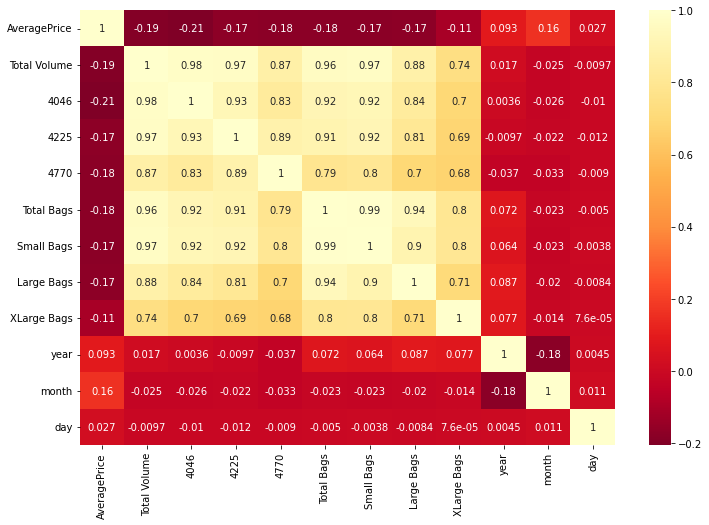

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

-  Total Volume, 4046,4225 & 4770 Total bags, small bags, Large bags & X large bags shows high corr with each other.

# Labelencoding

In [34]:
lencode=LabelEncoder()
df['type']=lencode.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1130.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1130.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1130.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1130.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1130.0,0,2015,Albany,11,29


- Type col is label encoded

In [35]:
df.groupby('type').size()

type
0    9126
1    9123
dtype: int64

-  class of type col is same

In [36]:
lencode=LabelEncoder()
df['year']=lencode.fit_transform(df['year'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1130.0,0,0,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1130.0,0,0,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1130.0,0,0,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1130.0,0,0,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1130.0,0,0,Albany,11,29


-  year col is encoded and can be seen in dataframe above with class values shown below in groupby

In [37]:
df.groupby('year').size()

year
0    5615
1    5616
2    5722
3    1296
dtype: int64

In [38]:
lencode=LabelEncoder()
df['region']=lencode.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,1130.0,0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,1130.0,0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,1130.0,0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,1130.0,0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,1130.0,0,0,0,11,29


-  Target col region is also encoded 

## VIF : Multicollinearity test

from statsmodels.stats.outliers_influence import variance_inflation_factor # Importing VIF

In [40]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- computing VIF

In [41]:
vif_calc()

       VIF Factor      features
0       14.173725  AveragePrice
1     8953.466384  Total Volume
2     1189.090456          4046
3     1102.170441          4225
4       14.446382          4770
5   141182.245901    Total Bags
6    80446.526039    Small Bags
7     8517.371541    Large Bags
8       47.503391   XLarge Bags
9        3.413145          type
10       2.760816          year
11       3.699228        region
12       4.181540         month
13       3.707858           day


- Total Bags,  Small Bags, Large Bags, XLarge Bags are highly correlated.
- region col doesnt show corr and multicollinearity with others variables.

In [42]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

In [43]:
df.drop(['Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)

- Above 'Total Bags','Small Bags','Large Bags','XLarge Bags' are dropped becuse of high multicollinearity among each others
- These var are less significant and not influencing the target col

In [44]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,0,0,11,29


# Outliers Removal

<AxesSubplot:>

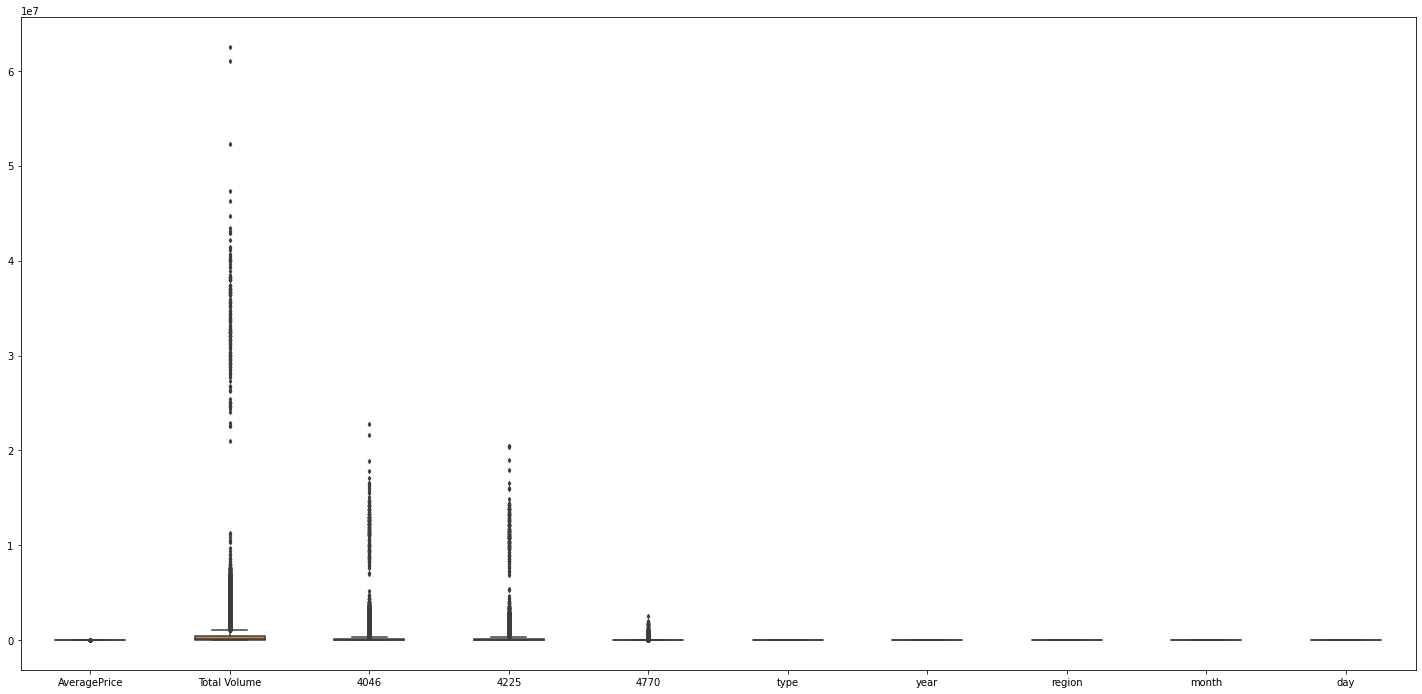

In [45]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- High Outliers present in Total Volume, 4046,4225 & 4770 Col.

In [46]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  346,   359,   783,   787,   788,   790,   791,   792,   794,
         795,   796,   797,   799,   803,   805,   807,   808,   809,
         812,   816,   820,   823,   827,  1334,  1347,  1516,  1518,
        1541,  2340,  2341,  2348,  2351,  2368,  2370,  2652,  2652,
        2652,  2652,  2653,  2653,  2653,  2653,  2654,  2654,  2654,
        2654,  2655,  2655,  2655,  2655,  2656,  2656,  2656,  2656,
        2657,  2657,  2657,  2657,  2658,  2658,  2658,  2658,  2659,
        2659,  2659,  2659,  2660,  2660,  2660,  2660,  2661,  2661,
        2661,  2661,  2662,  2662,  2662,  2662,  2663,  2663,  2663,
        2663,  2664,  2664,  2664,  2664,  2665,  2665,  2665,  2665,
        2666,  2666,  2666,  2666,  2667,  2667,  2667,  2667,  2668,
        2668,  2668,  2668,  2669,  2669,  2669,  2669,  2670,  2670,
        2670,  2670,  2671,  2671,  2671,  2671,  2672,  2672,  2672,
        2672,  2673,  2673,  2673,  2673,  2674,  2674,  2674,  2674,
        2675,  2675

In [47]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (17838, 10)


- Outliers removed as we can see shape of the rows which is reduced to 17838

In [48]:
Data_loss=((18249-17838)/18249)*100

- Computing Data loss

In [49]:
Data_loss

2.25217820154529

- data loss is very less and outliers present in those 4 col is high, so i will once again apply z score to remove more outliers.

In [50]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  312,   312,   312, ..., 16854, 17022, 17023], dtype=int64), array([1, 2, 3, ..., 0, 0, 0], dtype=int64))


In [51]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (16708, 10)


- zscore applied second time to reduced outlier as we can see the rows got reduced to 16708

In [52]:
Data_loss=((18249-16708)/18249)*100

computing data loss

In [53]:
Data_loss

8.44429831771604

- data loss is greater then 8% percent but still I prefer to remove the outliers as the same is high.
- reamaining outliers will be averaged out by tree based algorithm

## Skewness

In [54]:
df.skew()

AveragePrice    0.304307
Total Volume    3.486804
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

- Total Volume, 4046,4225 & 4770 shows high positive skewness.

# Disstplot

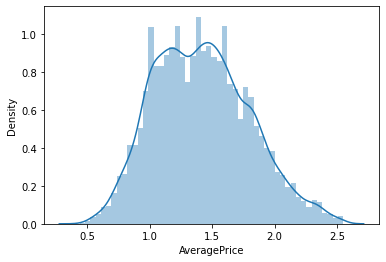

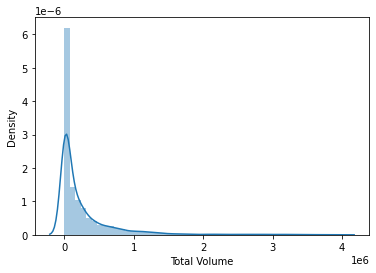

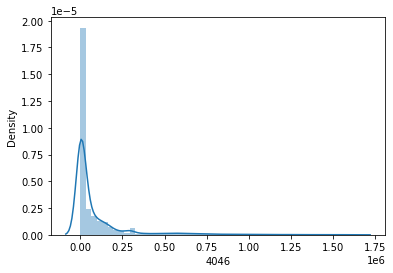

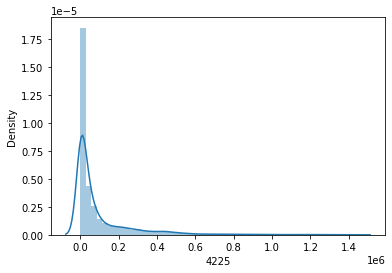

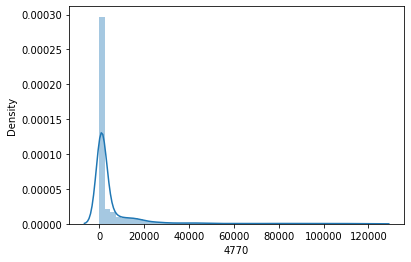

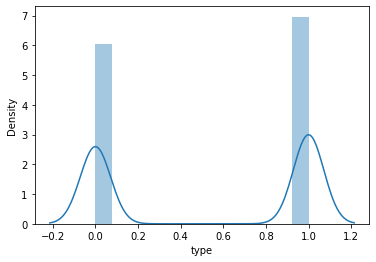

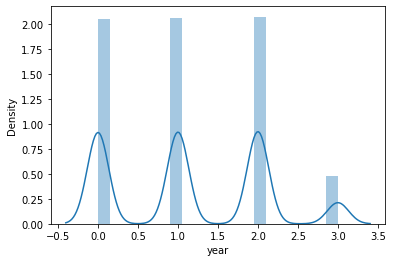

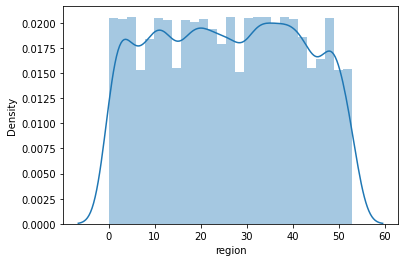

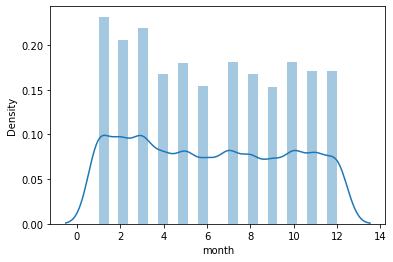

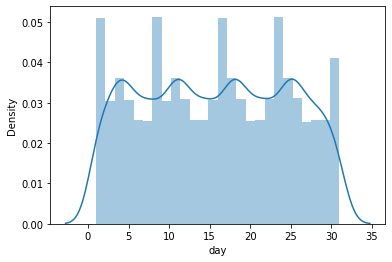

In [56]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- Total Volume, 4046,4225 & 4770 are right skewed seen in disstplot above

# Dividing dataset in x-independent var & target col

In [58]:
x=df.drop("region",axis=1) # Independent var
y=df["region"] # target col

In [59]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,0,11,29


In [ ]:
- x dataframe as independent var 

y.head() # y as target var

# Removing skewness

In [61]:
x.skew()

AveragePrice    0.304307
Total Volume    3.486804
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

- removing the skewness in Total Volume, 4046,4225 & 4770

In [62]:
import numpy as np
x['Total Volume']=np.sqrt(x['Total Volume'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [63]:
import numpy as np
x['4046']=np.sqrt(x['4046'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            1.779013
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [64]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            1.779013
4225            3.330606
4770            2.379316
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [65]:
import numpy as np
x['4225']=np.sqrt(x['4225'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            1.779013
4225            1.434689
4770            2.379316
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [66]:
import numpy as np
x['4046']=np.sqrt(x['4046'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            0.794965
4225            1.434689
4770            2.379316
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [67]:
import numpy as np
x['4225']=np.sqrt(x['4225'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            0.794965
4225            0.512519
4770            2.379316
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [68]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

AveragePrice    0.304307
Total Volume    1.421583
4046            0.794965
4225            0.512519
4770            0.990032
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [69]:
import numpy as np
x['Total Volume']=np.sqrt(x['Total Volume'])
x.skew()

AveragePrice    0.304307
Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            0.990032
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [70]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

AveragePrice    0.304307
Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            0.194870
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

In [71]:
import numpy as np
x['4046']=np.sqrt(x['4046'])
x.skew()

AveragePrice    0.304307
Total Volume    0.563248
4046            0.264156
4225            0.512519
4770            0.194870
type           -0.143063
year            0.222602
month           0.102427
day             0.011771
dtype: float64

- Mutiple time sqrt method is applied to Total Volume, 4046,4225 & 4770 var to reduce the skewness.
- The skewness is reduced to normal range as seen above and below in distplot.

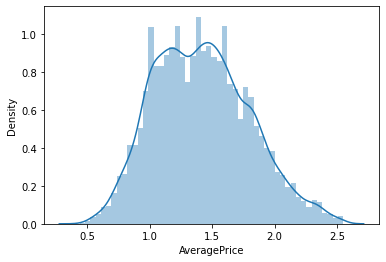

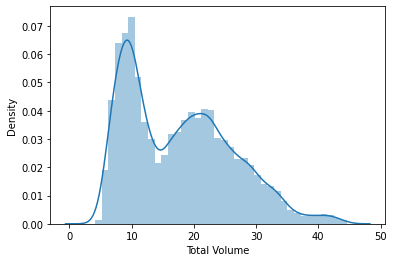

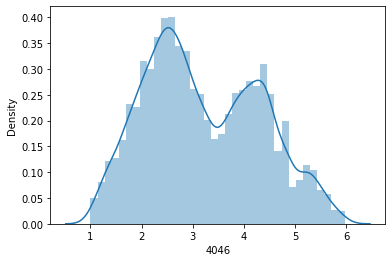

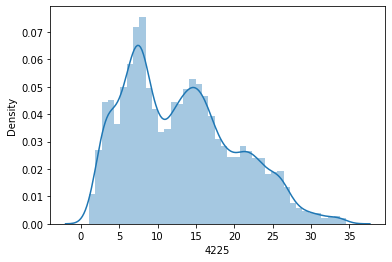

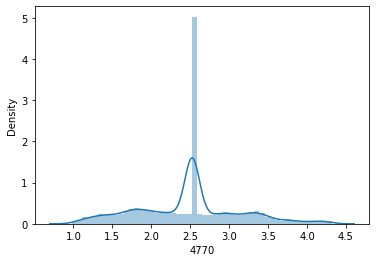

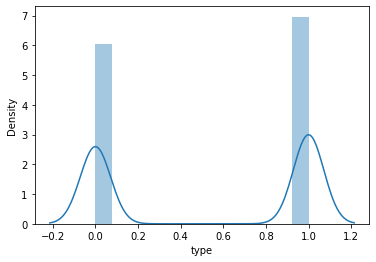

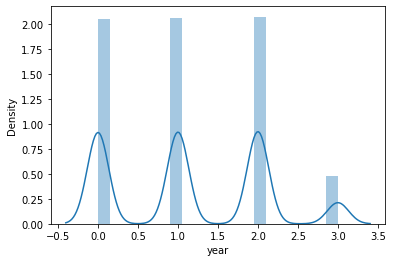

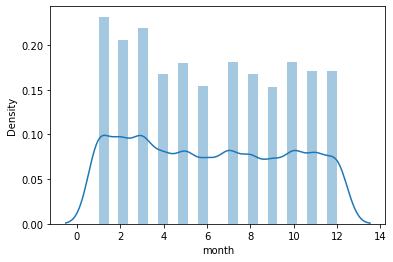

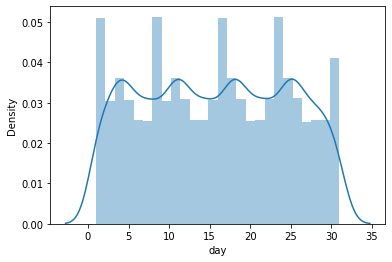

In [72]:
for i in x:
    plt.figure()
    sns.distplot(x[i])

# Power transform to reduce left & right skewed data

- Power transform is applied to reduce left & right skewed data.

# Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

- Importing standard sclaer library from preprocessing module.

In [74]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-0.22997457, -0.20901703, -0.72867325, ..., -1.2187082 ,
         1.63864214,  1.28996009],
       [-0.17759348, -0.28096079, -0.8391108 , ..., -1.2187082 ,
         1.63864214,  0.4919459 ],
       [-1.27759644,  0.097982  , -0.79762662, ..., -1.2187082 ,
         1.63864214, -0.30606828],
       ...,
       [ 1.18431495, -0.80462597, -0.69157129, ...,  1.97335586,
        -1.46676889,  0.60594793],
       [ 1.34145823, -0.75186333, -0.62394382, ...,  1.97335586,
        -1.46676889, -0.19206626],
       [ 0.52955128, -0.72643782, -0.43977441, ...,  1.97335586,
        -1.46676889, -0.99008044]])

- Standard Scaler is applied to x independent variables to make all vaues in same range.

In [75]:
x.shape

(16708, 9)

- Independent var shows 16708 rows and 9 var

In [76]:
y.shape

(16708,)

- y as target col shows 16708 rows

In [77]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

72.92040694195093 at random_state 0
72.0526630760024 at random_state 1
74.86535008976661 at random_state 2
70.97546379413525 at random_state 3
71.7833632555356 at random_state 4
73.12986235786954 at random_state 5
73.48892878515859 at random_state 6
73.0101735487732 at random_state 7
72.86056253740276 at random_state 8
72.89048473967684 at random_state 9
73.24955116696589 at random_state 10
73.39916217833633 at random_state 11
72.2920406941951 at random_state 12
73.51885098743267 at random_state 13
74.59605026929982 at random_state 14
73.39916217833633 at random_state 15
72.47157390783961 at random_state 16
73.60861759425494 at random_state 17
73.78815080789947 at random_state 18
72.92040694195093 at random_state 19
73.09994015559546 at random_state 20
73.0101735487732 at random_state 21
73.66846199880311 at random_state 22
73.69838420107719 at random_state 23
72.14242968282466 at random_state 24
72.56134051466188 at random_state 25
72.32196289646919 at random_state 26
72.4117295032914

- Obs: DTC is set for 200 random state displaying accu for each state.

In [78]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7360861759425493  on Random_state  79


-Obs : Above code is used to select best random sate out of 200 random state which is 79 with accuracy of 73%

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 79)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 79

In [80]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       110
           1       0.59      0.63      0.61       101
           2       0.84      0.89      0.87       109
           3       0.65      0.76      0.70        85
           4       0.81      0.76      0.78        99
           5       0.74      0.68      0.71       114
           6       0.86      0.86      0.86        49
           7       0.84      0.75      0.79       110
           8       0.93      0.96      0.94        77
           9       0.78      0.82      0.80        91
          10       0.62      0.66      0.64       100
          11       0.73      0.78      0.76       102
          12       0.72      0.79      0.75        90
          13       0.65      0.74      0.69        92
          14       0.83      0.73      0.78       100
          15       0.86      0.97      0.91        58
          16       0.84      0.81      0.82        93
          17       0.77    

- DTC accu = 74%

In [81]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.72      0.82      0.77       101
           2       0.95      0.94      0.94       109
           3       0.81      0.88      0.84        85
           4       0.91      0.91      0.91        99
           5       0.89      0.77      0.83       114
           6       0.92      0.90      0.91        49
           7       0.98      0.84      0.90       110
           8       0.95      1.00      0.97        77
           9       0.81      0.91      0.86        91
          10       0.80      0.86      0.83       100
          11       0.82      0.90      0.86       102
          12       0.88      0.93      0.91        90
          13       0.90      0.85      0.87        92
          14       0.93      0.82      0.87       100
          15       0.98      0.97      0.97        58
          16       0.94      0.90      0.92        93
          17       0.93    

- RFC accu = 85%

In [82]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Support vector classifier is giving 78% acc on y test data

              precision    recall  f1-score   support

           0       0.46      0.64      0.53       110
           1       0.44      0.48      0.46       101
           2       0.92      0.90      0.91       109
           3       0.63      0.67      0.65        85
           4       0.66      0.68      0.67        99
           5       0.65      0.47      0.55       114
           6       0.79      0.78      0.78        49
           7       0.68      0.73      0.70       110
           8       0.85      0.99      0.92        77
           9       0.63      0.66      0.65        91
          10       0.53      0.48      0.50       100
          11       0.48      0.62      0.54       102
          12       0.72      0.84      0.78        90
          13       0.45      0.60      0.52        92
          14       0.55      0.38      0.45       100
          15       0.81      0.52      0.63        58
          16       0.75      0.86      0.80        93
          17       0.88    

- SVC accu is 63%

In [83]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

              precision    recall  f1-score   support

           0       0.46      0.64      0.53       110
           1       0.44      0.48      0.46       101
           2       0.92      0.90      0.91       109
           3       0.63      0.67      0.65        85
           4       0.66      0.68      0.67        99
           5       0.65      0.47      0.55       114
           6       0.79      0.78      0.78        49
           7       0.68      0.73      0.70       110
           8       0.85      0.99      0.92        77
           9       0.63      0.66      0.65        91
          10       0.53      0.48      0.50       100
          11       0.48      0.62      0.54       102
          12       0.72      0.84      0.78        90
          13       0.45      0.60      0.52        92
          14       0.55      0.38      0.45       100
          15       0.81      0.52      0.63        58
          16       0.75      0.86      0.80        93
          17       0.88    

- Knn Acc = 63%

# K-Fold Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [85]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [86]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.7346786054552089


In [87]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.8487546327468367


In [88]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Regressor  CV o/p

0.6458580990830605


In [89]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.47875154648796103


RFR is the best model as it has good accu and least diff value between RFR Acc - CV value = 85-84 = 1

# Hyperparameter & Gridsearchcv

In [90]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [91]:
import numpy as np
parameter = {'max_depth' : np.arange(2,8),
            'criterion':['gini','entropy'],
            'n_estimators' : [10],
            'max_features' : ['auto','sqrt','log2']}

- Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [92]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [93]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10]})

- Grid search CV applied to the Training Dataset 

In [94]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 10}

- Best Parameter is selected from grid search CV which is 
- 'criterion': 'entropy','max_depth': 7,'max_features': 'log2','n_estimators': '10'

## Best Model Selected is Random Forest Classifier

In [95]:
Final_mod = RandomForestClassifier(criterion = 'entropy', max_depth = 7,max_features='log2',n_estimators= 10)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

61.28067025733094


# AUC ROC Curve

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

-Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

In [97]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label= 1)

- Predicting the probabilty logic on x_test.
- Applying roc curve on y_test,predicted probability.

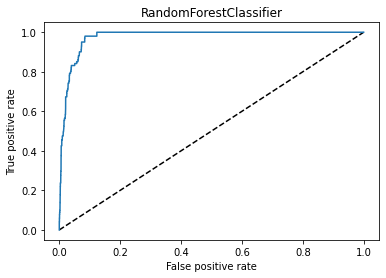

In [98]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Regression Model: where the target Var is Average Price.

# Importing libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Obs :

-Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.

-Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.

-Importing Common Regression Metrics Mean Absolute error, Mean Squared error.

-Importing r2 score.

-Importing Label encoder libraries as well as standard scaler libraries.

In [100]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,0,0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,0,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,0,0,11,29


- Verifying EDA Computed Dataframe.

# Dividing X indepndent Var(x) & Y target Var

In [101]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

In [102]:
x.head()

,Total Volume,4046,4225,4770,type,year,region,month,day
0,64236.62,1036.74,54454.85,48.16,0,0,0,12,27
1,54876.98,674.28,44638.81,58.33,0,0,0,12,20
2,118220.22,794.70,109149.67,130.50,0,0,0,12,13
3,78992.15,1132.00,71976.41,72.58,0,0,0,12,6
4,51039.60,941.48,43838.39,75.78,0,0,0,11,29


- x without Target Col

In [103]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

- y as target col

# Treating Skewness On x variables

In [104]:
x.skew()

Total Volume    3.486804
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

- Total Vol, 4046, 4225, 4770 shows highgly right skewed data.

# Sqrt Method to treat right skewed data

In [105]:
import numpy as np
x['Total Volume']=np.sqrt(x['Total Volume'])
x.skew()

Total Volume    1.421583
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [106]:
import numpy as np
x['Total Volume']=np.sqrt(x['Total Volume'])
x.skew()

Total Volume    0.563248
4046            3.679576
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [107]:
import numpy as np
x['4046']=np.sqrt(x['4046'])
x.skew()

Total Volume    0.563248
4046            1.779013
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [108]:
import numpy as np
x['4046']=np.sqrt(x['4046'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            3.330606
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [109]:
import numpy as np
x['4225']=np.sqrt(x['4225'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            1.434689
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [110]:
import numpy as np
x['4225']=np.sqrt(x['4225'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            4.509026
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [111]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            2.379316
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [112]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            0.990032
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

In [113]:
import numpy as np
x['4770']=np.sqrt(x['4770'])
x.skew()

Total Volume    0.563248
4046            0.794965
4225            0.512519
4770            0.194870
type           -0.143063
year            0.222602
region          0.008764
month           0.102427
day             0.011771
dtype: float64

- Multiple times sqrt method is applied on same skewed variables above (Total Vol, 4046, 4225, 4770) to reduce skewness.
- After applying sqrt method on above col skewness is greatly reduced.

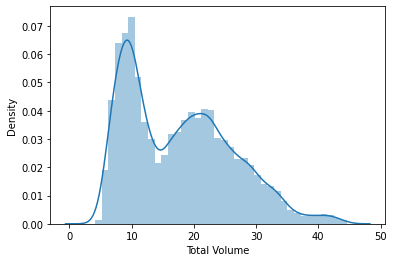

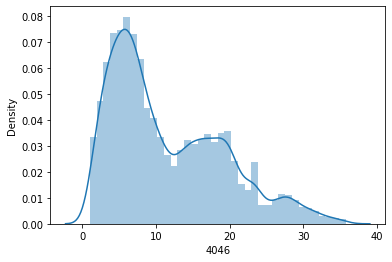

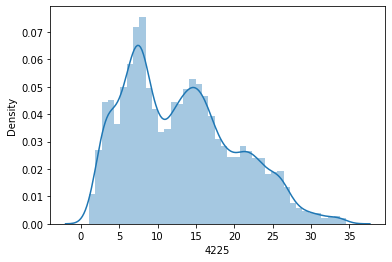

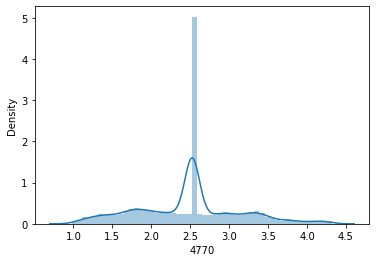

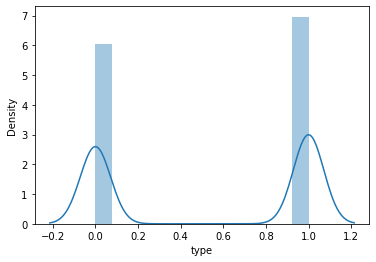

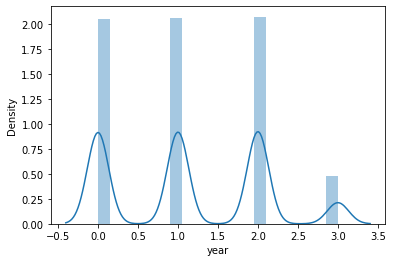

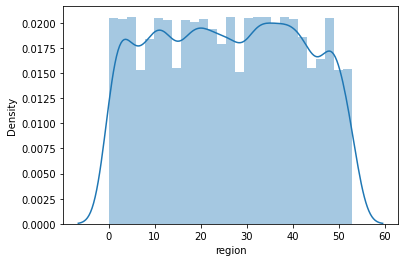

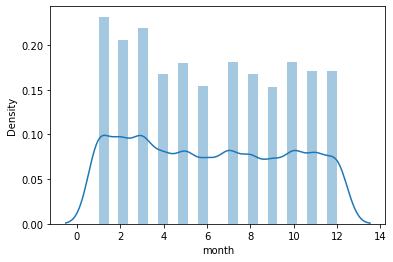

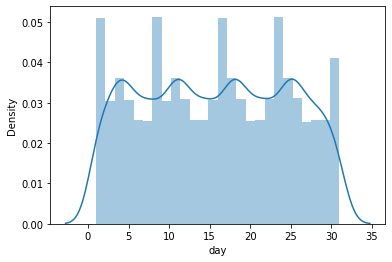

In [114]:
for i in x:
    plt.figure()
    sns.distplot(x[i])

- Multiple times sqrt method is applied on same skewed variables above (Total Vol, 4046, 4225, 4770) to reduce skewness.
- After applying sqrt method on above col skewness is greatly reduced.

In [115]:
x.shape

(16708, 9)

- x shows 16708 obs & 9 var

In [116]:
y.shape

(16708,)

- y as target var also has 16708 rows

### Power transform method is applied to reduce left & right skewed data

In [117]:
from sklearn.preprocessing import power_transform # Importing power tranform
x=power_transform(x,method='yeo-johnson') # Applying power transform to whole dataframe

# Standard Scaling

In [118]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[-0.0143629 , -0.69028964,  0.45717769, ..., -1.99969966,
         1.48833924,  1.22820793],
       [-0.09231605, -0.81975201,  0.36432347, ..., -1.99969966,
         1.48833924,  0.53840351],
       [ 0.29296599, -0.77076934,  0.79800112, ..., -1.99969966,
         1.48833924, -0.21919288],
       ...,
       [-0.75195443, -0.64746529, -0.78312467, ...,  1.58635602,
        -1.64261394,  0.64043332],
       [-0.67651211, -0.57025919, -0.71723242, ...,  1.58635602,
        -1.64261394, -0.10547997],
       [-0.64100964, -0.36544092, -0.79652181, ...,  1.58635602,
        -1.64261394, -0.95859087]])

- independent varible data is scaled to similar range.

In [119]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

0.13687522669568372 at random_state 0
0.1377076532462822 at random_state 1
0.13928001450852376 at random_state 2
0.1350090678273486 at random_state 3
0.13035727239753356 at random_state 4
0.13445593035908596 at random_state 5
0.1328073993471164 at random_state 6
0.13473340587595212 at random_state 7
0.13364889372506347 at random_state 8
0.13377040261153425 at random_state 9
0.13691512513601742 at random_state 10
0.13412948857453752 at random_state 11
0.13595937613347844 at random_state 12
0.13524845846935074 at random_state 13
0.1335926731955024 at random_state 14
0.13780195865070727 at random_state 15
0.1380050779833152 at random_state 16
0.12965723612622418 at random_state 17
0.1311207834602829 at random_state 18
0.1352285092491839 at random_state 19
0.13762604280014507 at random_state 20
0.13871780921291257 at random_state 21
0.1392872687704026 at random_state 22
0.13317555313746826 at random_state 23
0.13603373231773666 at random_state 24
0.13352013057671383 at random_state 25
0.13

- Decisiontree regressor is configured for 200 random state which shows acc for each state.

In [120]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  0.14031717534410532  on Random_state  191


- Best Random state selected is 191 with MAE = 0.14

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 191)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 191 computed above.

# Linear Regression

In [122]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.21110763339993527
Mean Squared error:  0.07337581372899987
Root Mean Squared Error: 0.27087970342755446
0.49001568745883006


0.4919385717811361

- LR not learned the model well with only 49% score.
- MAE is 2.1 quite high compared to others.
- r2 score is also less compared to others.

# Decision Tree Regression

In [123]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.1399800518651506
Mean Squared error:  0.044304209056453214
Root Mean Squared Error: 0.21048565047635245
0.6920722176685625


1.0

- DTR r2 score is less = 69%
- DTR MAE  = 0.13 higher then RFR.
- Though Model learned with 100% score.

# Random Forest Regression

In [124]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.10023700379014562
Mean Squared error:  0.02040251129662876
Root Mean Squared Error: 0.14283735959695126
0.8581963160755738


0.9815366231112985

- RFR learned the model with 98% Score.
- MAE is very less from rest others = 0.1
- r2 score is also high at 85% which fits the best line well over the data.

# Support Vector Regression

In [125]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  0.1538814006878007
Mean Squared error:  0.043779371697536304
Root Mean Squared Error: 0.20923520663964826
0.6957199975851399


0.7314595246622604

- SVC learned the model with 73% score.
- MAE = 0.15 & r2 score is less

# XGBoost Regression

In [126]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  0.0981354130363122
Mean Squared error:  0.01786588500270788
Root Mean Squared Error: 0.13366332706732942
0.8758266434400772


0.9554250974870377

 - XGBR Learned the model with 95% Score which is less then RFR.
 - MAE is less then RFC.
 - Diff of XGBR Score is Higher then RFC.

# K-Fold Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [128]:
cross_validation=KFold(5, shuffle =True)
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [129]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.49099097173179035


In [130]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

0.7310618167090153


In [131]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.8721147230874455


In [132]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

0.7057915573586866


In [133]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

0.8813065257011811


# Best Model Selection

- I have selected RFR as the best model because RFR model learned well with 98% score.
- Diff of RFR Score & CV is very less as compared with rest others which is = 98% - 87% = 11
- MAE of RFR is less among others except with XGBR.
- RFR shows high r2 score which shows model fits the best line on data.

## Hyperparameter & GridsearchCV

In [134]:
from sklearn.model_selection import GridSearchCV # Obs : importing GridSearchCV

# Setting Random Forest Hyperparameter

In [135]:
import numpy as np
parameter = {'max_depth': np.arange(2,8),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'n_estimators': [10]}

# Creating Gridserach CV Instance

In [136]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)
# Creating Grid Search CV Object and Applying GridSearch on best Model - RFR

In [137]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2], 'n_estimators': [10]})

- Applying Gridsearchcv to training set with RFR hyperparameters values.

In [138]:
GCV.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 10}

 - Best parameter is selected above

# Best Param is Applied to best Model

In [139]:
Final_mod = RandomForestRegressor(max_depth = 7, max_features = 'auto', min_samples_leaf = 1,n_estimators= 10)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  0.16323642812305225
Mean Squared error:  0.04734072355258745
Root Mean Squared Error: 0.21757923511352698
0.6709675146454153


0.9815366231112985

- Model learned at 98% score.
- We can get more better r2 score and MAE value by setting high value of n estimators and other value of hyperparameter.
- My system bit slow, so i was not able to properly set the hyper param
- However MAE is 0.16 which is less among other model.

# Exporting Model with Joblib Library

In [140]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

- Model is exported as .pkl file with the help of joblib library.